In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


# input data
plt.style.use("../data/inputs/ploting.mplstyle")
results_dir = Path("../data/results/MULTI-STATIONS -- 20251222_002304 -- f4c9/THUNDER BAY A-6048261")

In [17]:
events = pd.read_csv(results_dir / "01_input_data/03_rainfall_events_data.csv")
print("Data loaded successfully.")
display(events)

Data loaded successfully.


,Start Time,End Time,Duration (hrs),Volume (mm),Intensity (mm/hr),Peak Precipitation (mm),Inter-Event Time (hrs),IETD (hrs)
0,1960-05-04 05:00:00,1960-05-04 08:00:00,4.0,21.4,5.350000,9.9,NaN,6
1,1960-05-15 02:00:00,1960-05-15 02:00:00,1.0,0.3,0.300000,0.3,258.0,6
2,1960-05-19 17:00:00,1960-05-19 18:00:00,2.0,1.3,0.650000,1.0,111.0,6
3,1960-05-20 20:00:00,1960-05-22 02:00:00,31.0,37.3,1.203226,14.5,26.0,6
4,1960-05-26 22:00:00,1960-05-27 14:00:00,17.0,6.2,0.364706,1.3,116.0,6
...,...,...,...,...,...,...,...,...
2310,1994-10-19 14:00:00,1994-10-19 18:00:00,5.0,0.8,0.160000,0.4,27.0,6
2311,1994-10-22 10:00:00,1994-10-22 19:00:00,10.0,10.7,1.070000,2.5,64.0,6
2312,1994-10-23 05:00:00,1994-10-23 13:00:00,9.0,1.2,0.133333,0.3,10.0,6
2313,1994-10-23 22:00:00,1994-10-24 01:00:00,4.0,1.3,0.325000,1.1,9.0,6


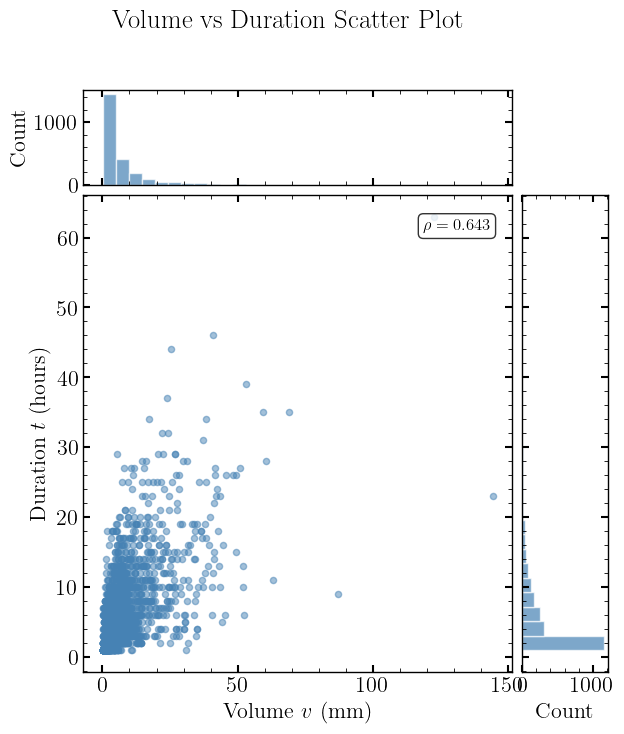

In [10]:
"""
Scatter plot of Volume vs Duration with marginal histograms.
Shows the dependency structure between event characteristics.
"""

fig = plt.figure(figsize=(8, 8))

# Create grid for main plot and marginals
gs = fig.add_gridspec(3, 3, width_ratios=[0.2, 1, 0.2], 
                        height_ratios=[0.2, 1, 0.05],
                        hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[1, 1])
ax_top = fig.add_subplot(gs[0, 1], sharex=ax_main)
ax_right = fig.add_subplot(gs[1, 2], sharey=ax_main) 

# Main scatter plot
ax_main.scatter(events['Volume (mm)'], events['Duration (hrs)'], 
                alpha=0.5, s=20, c='steelblue')
ax_main.set_xlabel(r'Volume $v$ (mm)')
ax_main.set_ylabel(r'Duration $t$ (hours)')

# Top marginal histogram (Volume)
ax_top.hist(events['Volume (mm)'], bins=30, color='steelblue', 
            edgecolor='white', alpha=0.7)
ax_top.tick_params(labelbottom=False)
ax_top.set_ylabel('Count')

# Right marginal histogram (Duration) - horizontal
ax_right.hist(events['Duration (hrs)'], bins=30, color='steelblue',
                edgecolor='white', alpha=0.7, orientation='horizontal')
ax_right.tick_params(labelleft=False)
ax_right.set_xlabel('Count')

# Add correlation annotation
corr = events['Volume (mm)'].corr(events['Duration (hrs)'])
ax_main.annotate(fr'$\rho = {corr:.3f}$', xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=12,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

fig.suptitle('Volume vs Duration Scatter Plot')
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

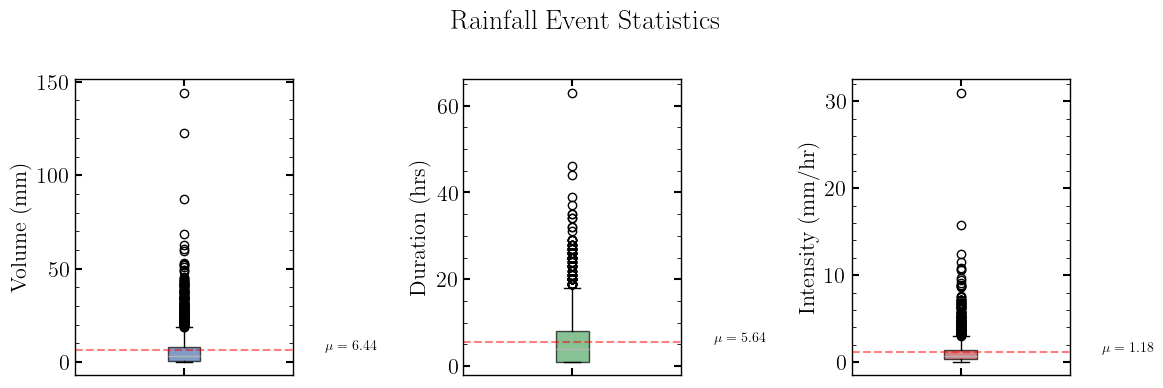

In [11]:
"""
Box plots of event statistics: Volume, Duration, Intensity.
"""
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

columns = ['Volume (mm)', 'Duration (hrs)', 'Intensity (mm/hr)']
colors = ['#4C72B0', '#55A868', '#C44E52']

for ax, col, color in zip(axes, columns, colors):
    bp = ax.boxplot(events[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    ax.set_ylabel(col)
    ax.set_xticklabels([''])
    
    # Add mean annotation
    mean_val = events[col].mean()
    ax.axhline(mean_val, color='red', linestyle='--', alpha=0.5)
    ax.annotate(rf'$\mu = {mean_val:.2f}$', xy=(1.15, mean_val), 
                xycoords=('axes fraction', 'data'), fontsize=10)

fig.suptitle('Rainfall Event Statistics', fontsize=20)
plt.tight_layout()
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

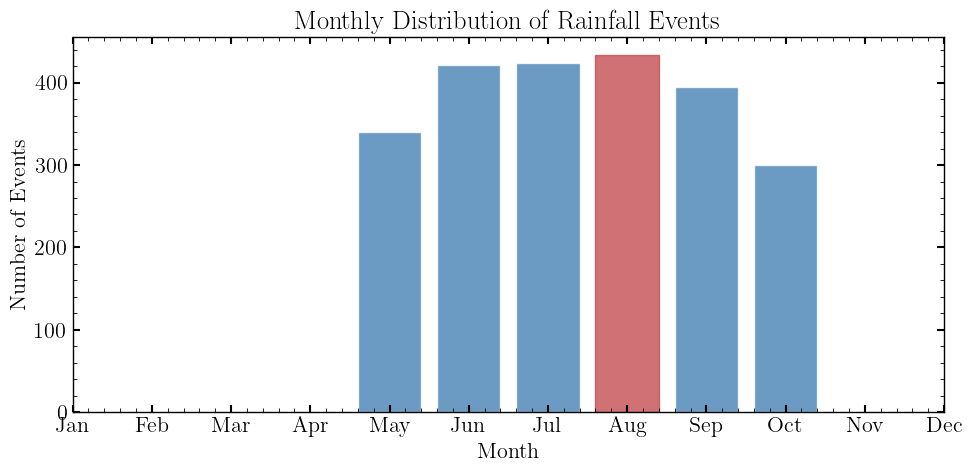

In [12]:
"""
Bar chart showing number of events per month.
"""
fig, ax = plt.subplots(figsize=(10, 5))

# Extract month from datetime
events_df = events.copy()
events_df['Month'] = pd.to_datetime(events_df["Start Time"]).dt.month

monthly_counts = events_df['Month'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Only plot months that have data
x = monthly_counts.index
y = monthly_counts.values

bars = ax.bar(x, y, color='steelblue', edgecolor='white', alpha=0.8)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Events')
ax.set_title('Monthly Distribution of Rainfall Events')

# Highlight max month
max_idx = np.argmax(y)
bars[max_idx].set_color('#C44E52')

plt.tight_layout()
# plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


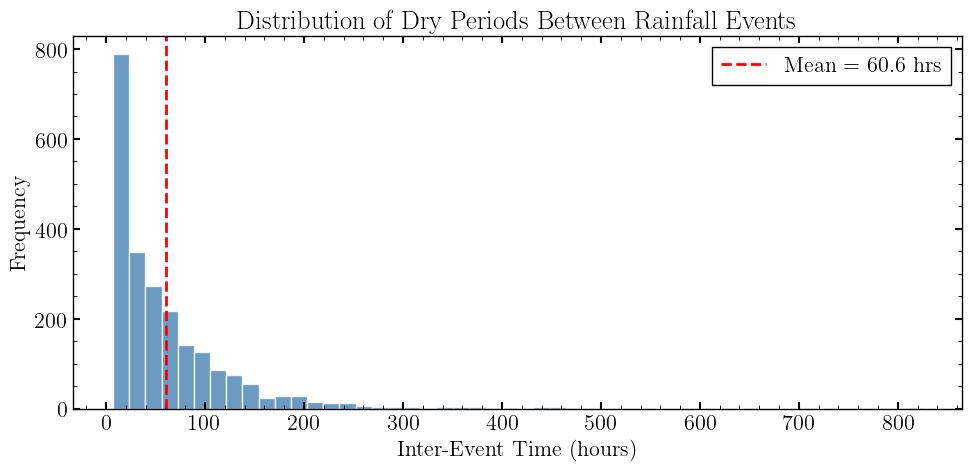

In [13]:
"""
Histogram of inter-event times (dry periods).
"""
fig, ax = plt.subplots(figsize=(10, 5))

iet_data = events["Inter-Event Time (hrs)"].dropna()

ax.hist(iet_data, bins=50, color='steelblue', edgecolor='white', alpha=0.8)
ax.set_xlabel('Inter-Event Time (hours)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Dry Periods Between Rainfall Events')

# Add statistics
mean_iet = iet_data.mean()
ax.axvline(mean_iet, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {mean_iet:.1f} hrs')
ax.legend()

plt.tight_layout()
# plt.savefig(save_path, dpi=300, bbox_inches='tight')